# Lesson 7 - Sentiment Analysis

This assignment requires that you build a sentiment analysis classifier for a series of tweets.
The data consists of a file "twitter_data.csv". The file contains 16,000 tweets with their respective score. The attributes are the sentences, and the score is either 4 (for positive) or 0 (for negative).

In [1]:
#pip install wordcloud

In [2]:
#Imports
import csv
import string
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix
from scipy.stats import uniform
from collections import Counter
import argparse
import pprint
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#Read files
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/twitter_data.csv"
df = pd.read_csv(url, sep=",")
df.columns = ["sentiment_label","tweet_text"]

print(df.head())

   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


Question 1: Generate word cloud for positive sentiment.

In [4]:
def preprocess(text, list_of_steps):
    for step in list_of_steps:
        if step == 'remove_non_ascii':
            text = ''.join([x for x in text if ord(x) < 128])
        elif step == 'lowercase':
            text = text.lower()
        elif step == 'remove_punctuation':
            punct_exclude = set(string.punctuation)
            text = ''.join(char for char in text if char not in punct_exclude)
        elif step == 'remove_numbers':
            text = ''.join([char for char in text if not char.isdigit()])
        elif step == 'remove_stopwords':
            stops = set(stopwords.words('english'))
            word_list = text.split(' ')
            text_words = [word for word in word_list if word.lower() not in stops]
            text = ' '.join(text_words)
        elif step == 'stem_words':
            lmtzr = WordNetLemmatizer()
            word_list = text.split(' ')
            stemmed_words =  [lmtzr.lemmatize(w) for w in word_list]
            text = ' '.join(stemmed_words)
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
    return text

steps = ['remove_non_ascii', 'lowercase', 'remove_punctuation', 'remove_numbers',
            'strip_whitespace', 'remove_stopwords', 'stem_words']

df['clean_tweet']=df['tweet_text'].apply(lambda s: preprocess(s, steps))
pos_clean_string=','.join(df.loc[df['sentiment_label']==4, :]['clean_tweet'])
wordcloud=WordCloud(max_words=50,width=2500,height=1500,background_color='black',stopwords=STOPWORDS).generate(pos_clean_string)# plot wordcloud objectfig=plt.figure(figsize=(20,10),facecolor='k',edgecolor='k')plt.imshow(wordcloud, interpolation='bilinear')plt.axis('off')plt.tight_layout(pad=0)plt.show()


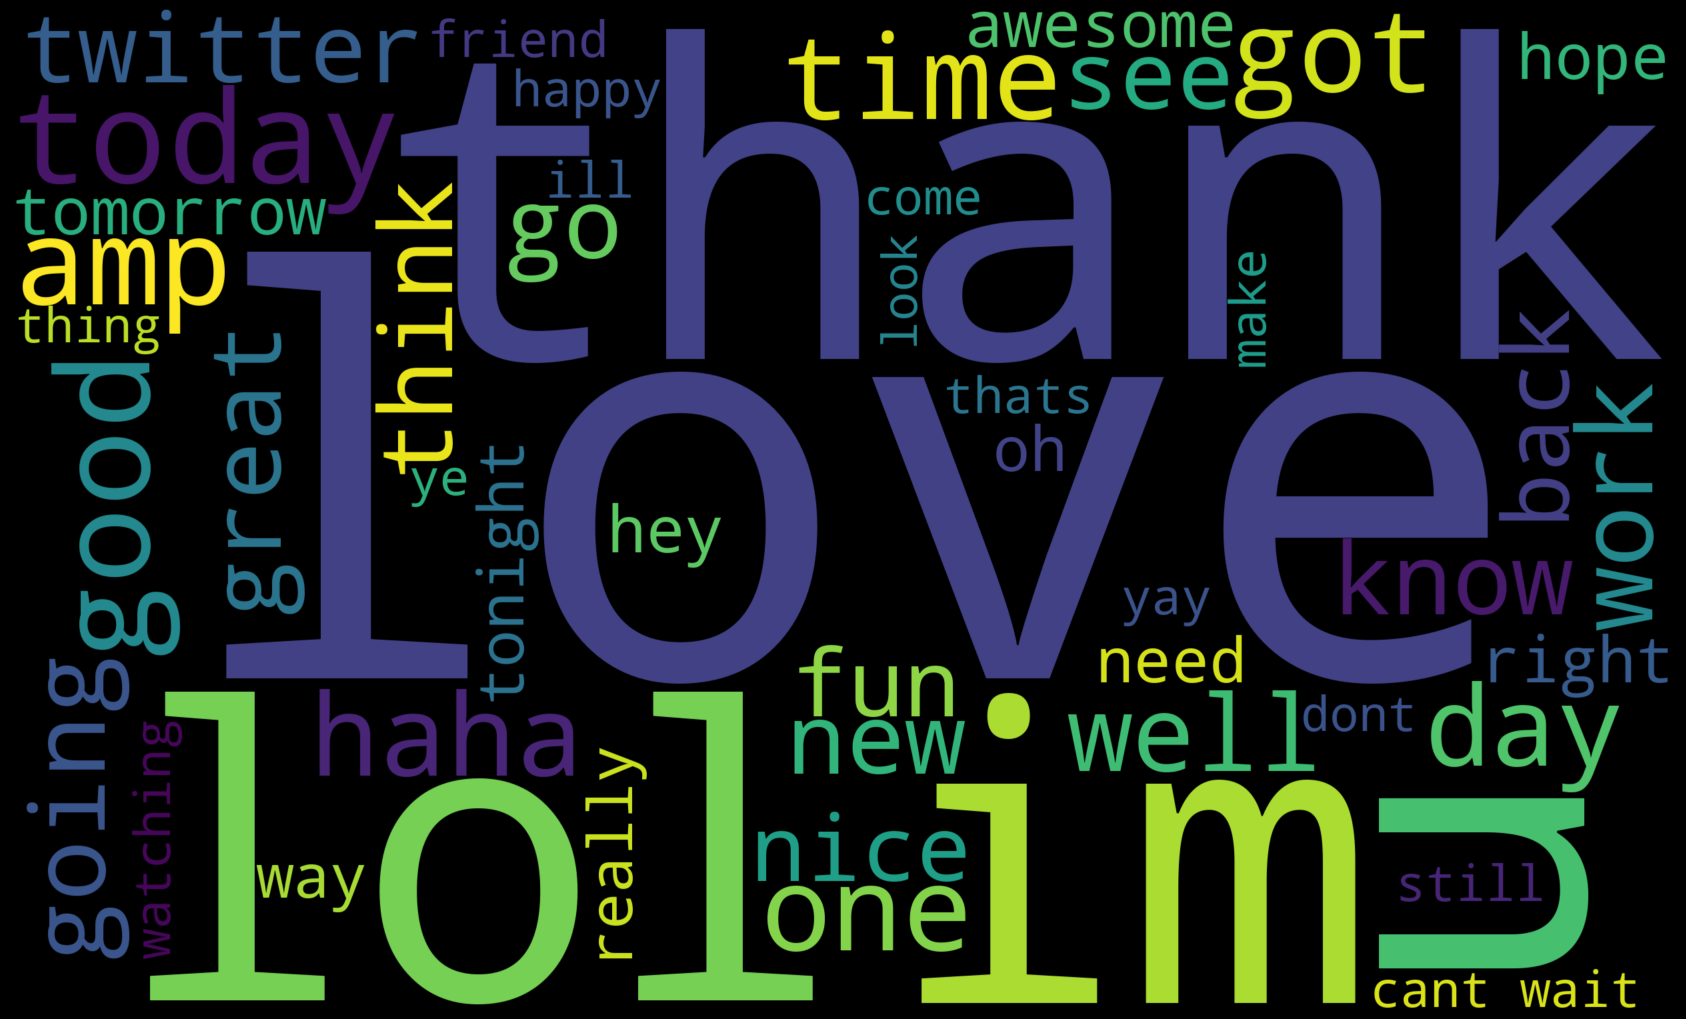

In [5]:
#plot wordcloud object
fig = plt.figure(
figsize = (20, 10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear') #'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 2: Generate word cloud for negative sentiment.

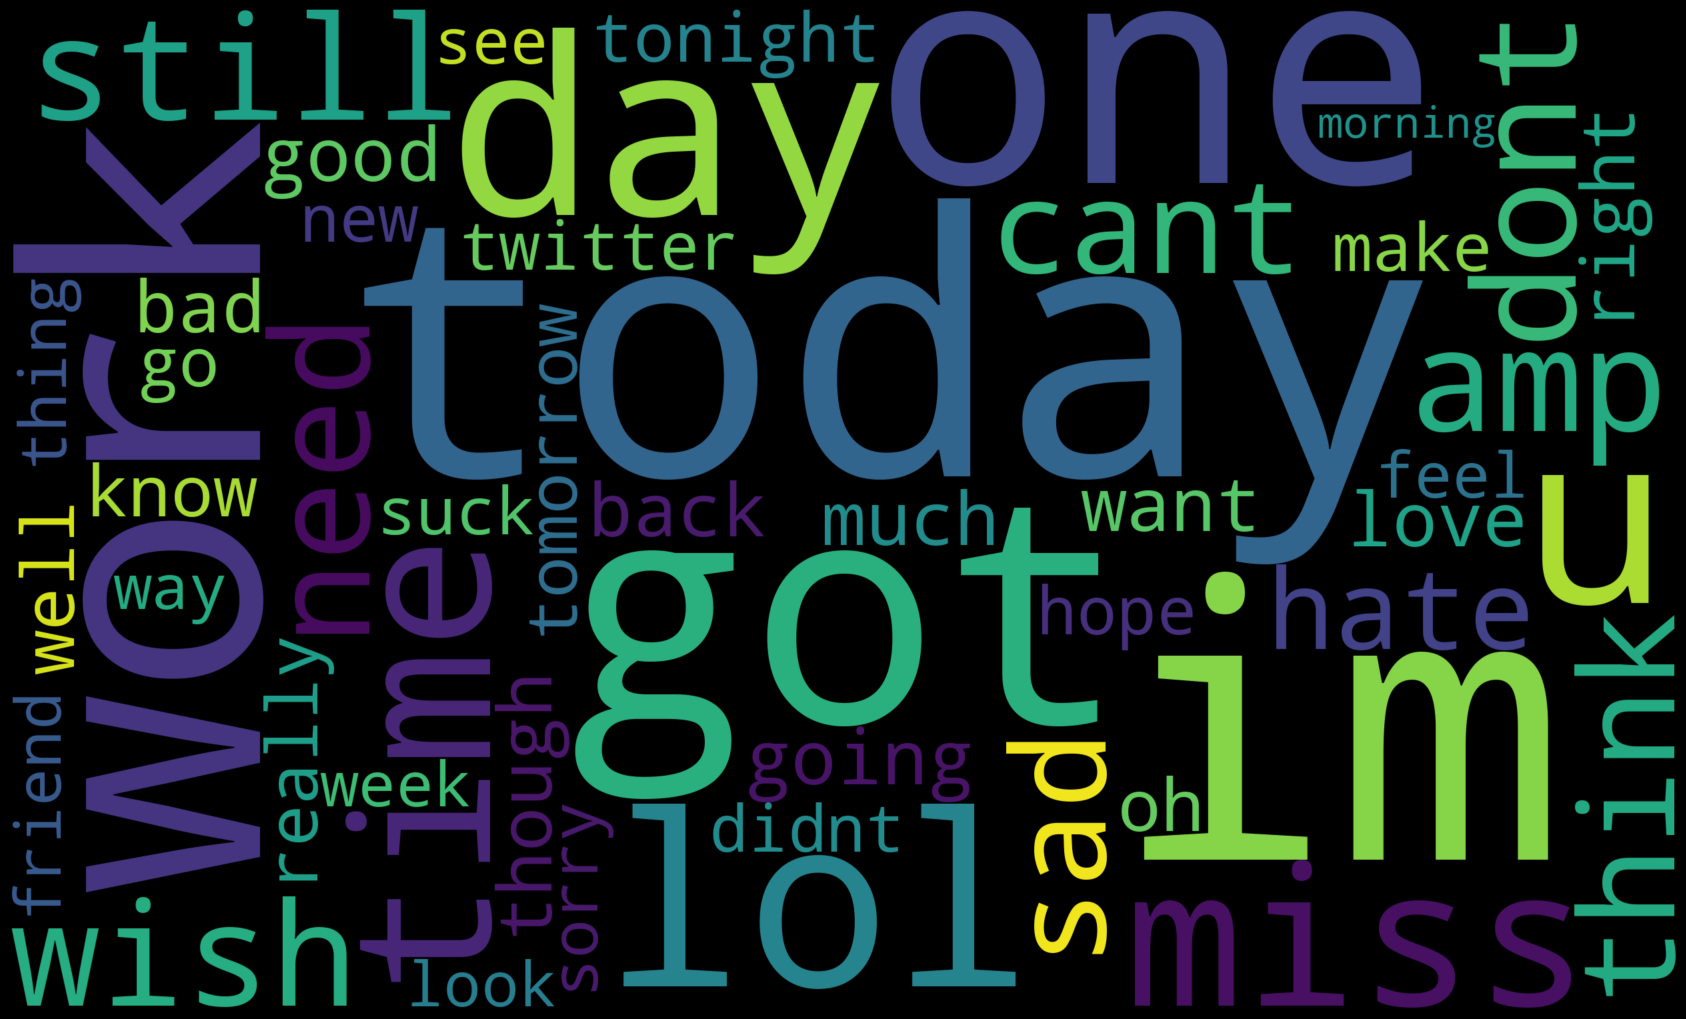

In [6]:
# join entire clean_tweet column
neg_clean_string = ','.join(df.loc[df['sentiment_label'] == 0, :]['clean_tweet'])
# create wordcloud object
wordcloud = WordCloud(
max_words=50,
width = 2500,
height = 1500,
background_color = 'black',
stopwords = STOPWORDS).generate(neg_clean_string)
# plot wordcloud object
fig = plt.figure(
figsize = (20, 10),
facecolor = 'k',
edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 3: Split data where test size = 40000, random_state = 42. Max_df=0.5, max_features = 6228,

In [7]:
# Declare the TFIDF vectorizer.
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', stop_words=stopwords.words('english'))
# Fit the vectorizer over the dataset
clean_texts = df['clean_tweet']
tf_idf_tweets = vectorizer.fit_transform(clean_texts)
# split the data
y_targets = np.array(df['sentiment_label'])
X_train, X_test, y_train, y_test = train_test_split(tf_idf_tweets, y_targets, test_size=40000, random_state=42)

Question 4: Build a classifier that classifies the sentiment of a sentence. Criteria - loss = modified_huber, learning_rate = adaptive, peanlty = elasticnet, set an alpha and eta as well.

In [8]:
model = SGDClassifier(loss='modified_huber', penalty='elasticnet', alpha=0.0001, eta0=0.001)
model.fit(X_train, y_train)

SGDClassifier(eta0=0.001, loss='modified_huber', penalty='elasticnet')

Question 5: What is the accuracy of your model when applied to testing data?

In [9]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


[[14582  5474]
 [ 3885 16059]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     20056
           4       0.75      0.81      0.77     19944

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



Question 6: What conclusions can you draw from the model?

Our model appears to perform decently, but not great and is better at predicting negative senti-
ment than it does positive sentiment. Our model could be better at predicting positive sentiment
because it more often predict positive sentiment than negative.

[Bonus] Question 7: If you are to build a sentiment analysis model, would it be dependent on the source of data?

Q7.

Yes, it absolutely would be.

1. Community Reviews Imagine you built sentiment analysis for a product based on aggregate data from various review websites and forums. Given the propensity of people to "review bomb" various things such as restaurants, movies, games, etc. you're likely to get an overwhelmingly negative sentiment for certain things. On top of that, people who are most disgruntled tend to write more reviews on average. Once you start building that analysis and using it as market research, you're likely to come to potentially wrong conclusions due to the way the internet community(s) work.
2. Botnets can make this increasingly difficult as flooding is also a possibility with paid actors or automated systems.

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Q.8.

1. I actually have experience with this! I wrote a webcrawler + scraper + semantical analysis tool for Python back in 2015 as a personal project. I trained it on the Gutenberg Project after scraping the raw web text data. It's been years and it was more of a learning project for myself. I wish I had stuck with it though, seeing as how the industry (and even some of these libraries) did not exist at that time. It was so rudimentary compared to even this lab! So fun to see how things have changed.
2. No steps were missing here other than perhaps finding a better data source than X/Twitter (:P). The scraping/crawling portion is out of scope for this course. For my personal case I had it crawling any active links. I eventually wanted to train my own model on Wikipedia, but stripping out the Javascript and needless additives like tags got difficult since it varied so much.
3. This technique can be used heavily for training NLP/neural network models. It can also be used to build sentiment for particular products, also known as "market research", which can land companies in strange spots where their market research may not match up with what the customers or biggest proponents of their products want. So on top of this, it's important to get it right and maybe have an ensemble of sentiment analysis!

In [ ]:
%%shell

jupyter nbconvert --to html /content/Lab07.ipynb